This notebook is made to clear the fundamentals of data augmentation.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.16.1
Num GPUs Available: 0


In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:

list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

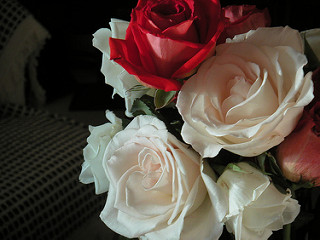

In [9]:

PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

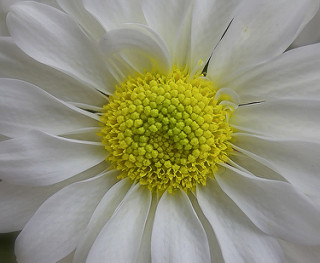

In [11]:
PIL.Image.open(str(flowers_images_dict['daisy'][0]))

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:

X = np.array(X)
y = np.array(y)

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(50, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.4775 - loss: 1.2624
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5996 - loss: 1.0117
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.6940 - loss: 0.8083
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.7874 - loss: 0.5873
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.8761 - loss: 0.3595
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9368 - loss: 0.2037
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9604 - loss: 0.1359
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9793 - loss: 0.0799
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.9775 - loss: 0.0838
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9895 - loss: 0.0443


In [23]:
model.save("unAugmented_cnn.keras")

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6231 - loss: 2.0204


[2.020402669906616, 0.6230936646461487]

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


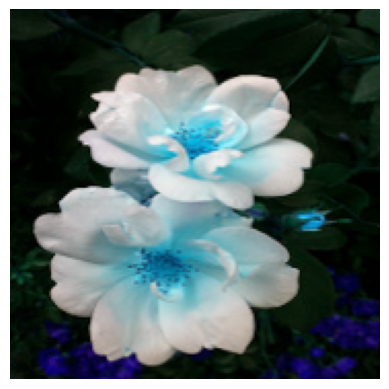

In [20]:

plt.axis('off')
plt.imshow(X[0])

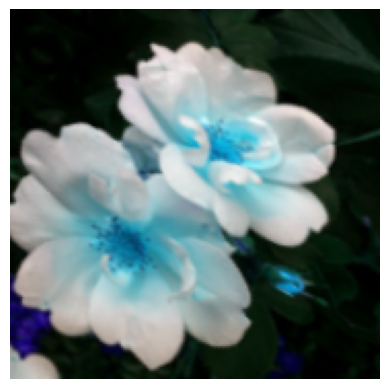

In [21]:

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=25)  



Epoch 1/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.4622 - loss: 1.2958
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.5952 - loss: 1.0239
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.6395 - loss: 0.9258
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.6759 - loss: 0.8325
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - accuracy: 0.6875 - loss: 0.7960
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7133 - loss: 0.7355
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 367ms/step - accuracy: 0.7307 - loss: 0.7104
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.7420 - loss: 0.6600
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.7573 - loss: 0.6416
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.7638 - loss: 0.6230
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.7605 - loss: 0.6007
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 28

In [27]:
model.save("Augmented_cnn.keras")

In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7407 - loss: 0.9236


[0.9235676527023315, 0.7407407164573669]